# Applying Otsu’s binarization.

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('coins.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

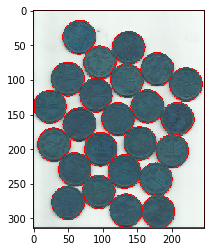

In [13]:
plt.imshow(img)

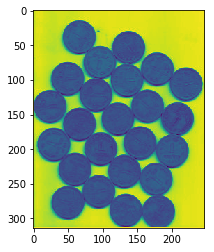

In [2]:
plt.imshow(gray)

# Though this method has been applied, the coins will be mutually touching

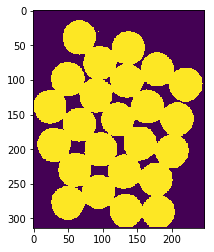

In [6]:
plt.imshow(thresh)

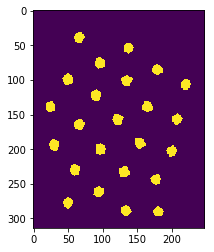

In [17]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
#plt.imshow(sure_bg)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
plt.imshow(sure_fg)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [9]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

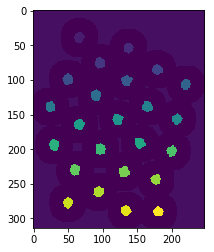

In [10]:
plt.imshow(markers)

In [11]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

# final output after applying watershed

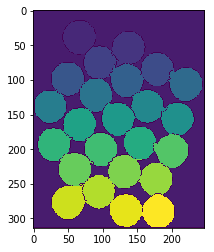

In [12]:
plt.imshow(markers)